<a href="https://colab.research.google.com/github/howard-ops/20251207/blob/main/20251209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import urllib.request as req
import pandas as pd

url = "https://api.gamer.com.tw/anime/v1/danmu.php?videoSn=36632&geo=TW%2CHK"
f = req.urlopen(url)
content = f.read()
content_convert = json.loads(content)

danmus = content_convert["data"]["danmu"]
#型態轉換:DataFrame(pandas自訂表格型態)
df = pd.DataFrame(danmus)
#如果不要列標籤(index=False)
df.to_csv("danmus.csv", encoding="utf-8")

In [3]:
import pandas as pd
#如果有index 多帶index_col=0
df = pd.read_csv("danmus.csv", encoding="utf-8", index_col=0)
df

,text,color,size,position,time,sn,userid
0,二刷,#FFFFFF,1,0,0,42903755,qaz1210731
1,吉伊卡哇！,#FFFFFF,1,0,0,45641971,dodylee0107
2,感謝動畫瘋！,#FFFFFF,1,0,0,45796240,hyg125
3,2025.11.24簽,#FDE53D,1,0,0,47316552,MilkTea157
4,吉依好可愛,#FFFFFF,1,0,5,40580321,KingOrange69
...,...,...,...,...,...,...,...
522,ˊˊˊˊˊˊˊˊˊˊˊˊˊˊˊˊˊˊˊ,#FFFFFF,1,0,893,46704569,swyan
523,我,#FFFFFF,1,0,897,45779317,Webb2012
524,😀,#00C3FC,1,0,898,40894473,kekerry75
525,沒了？？？？,#FFFFFF,1,0,901,42188563,linzzi


pandas兩大操作
1. 過濾: O
2. 轉換:

In [4]:
# 過濾的原理: 帶入([])跟你資料筆數一樣多的True/False
# True: 留下   False: 去除掉
fil = [True, False, False]
df.head(3)[fil]

,text,color,size,position,time,sn,userid
0,二刷,#FFFFFF,1,0,0,42903755,qaz1210731


In [ ]:
# 取行
df["userid"]
cols = ["userid", "text"]
df[cols]

In [5]:
df["userid"].value_counts()
target = "loenyen73"
fil = df["userid"] == target
df[fil]

,text,color,size,position,time,sn,userid
42,瘦版烏薩奇,#FFFFFF,1,0,65,42597745,loenyen73
322,烏薩奇跟吉伊卡哇是酒肉朋友,#FFFFFF,1,0,540,42597757,loenyen73
415,沒歌詞,#FFFFFF,1,0,695,42597761,loenyen73
504,我也是為了吉伊買會員😂😂,#FFFFFF,1,0,840,42597770,loenyen73


資料視覺化:
1. countplot
2. scatterplot

函式庫:
1. matplotlib: 基礎
2. seaborn: 把matplotlib功能再打包, 讓你輕易用

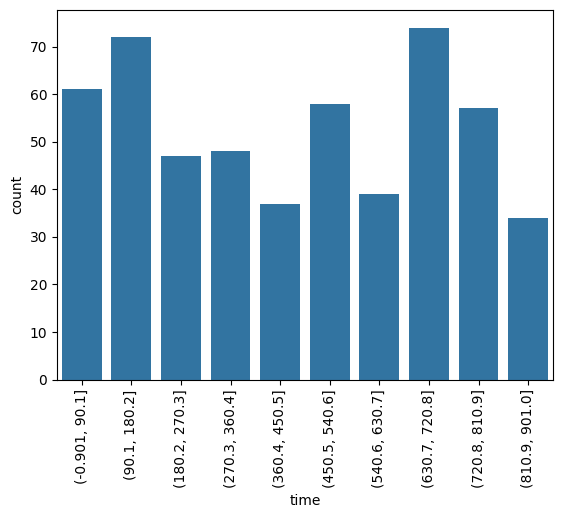

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

c = pd.cut(df["time"], bins=10)
sns.countplot(x=c)
plt.xticks(rotation=90)
plt.show()

In [7]:
# and 而且(&) or 或者(|)
fil1 = df["time"] >= 450
fil2 = df["time"] <= 540
fil = fil1 & fil2
df[fil]

,text,color,size,position,time,sn,userid
263,😯,#FFFFFF,1,0,450,40744524,ooxx1125
264,Isuzu b hsushshushs sixoxiu🫒😂🫒,#00FF91,1,0,450,41438775,s0714eddie
265,瓦勞誒,#FFFFFF,1,0,454,46686879,sioderdiu2
266,我朋友射了,#FF0026,1,1,455,44035504,Bro0201
267,兔子好鬧🤣🤣可愛,#FFFFFF,1,0,460,41452694,nina766335
268,阿,#FFFFFF,1,2,461,46431432,Wilfred326
269,鬆餅，你好香( 。ớ ₃ờ)ھ,#FFFFFF,1,0,463,43683890,annana566
270,人類：手機先吃,#FFFFFF,1,0,463,43683900,annana566
271,這食物這算不算SM,#FFFFFF,1,0,463,43683911,annana566
272,磅！,#FDE53D,1,2,465,37363800,chenwenxin


(爬蟲第一步)找網址
1. 打開原始碼
2. (有) 網址列 (無) F12找隱藏網址

HTML格式(網頁格式):

網頁是由一塊一塊的長方形(區塊)構成, 每一塊長方形可以包含其他長方形

<a href="網址"> 開始
    AIGRE DOUCE
</a> 結束

1. 名字: 決定區塊的用途
a: 超連結 img: 圖片 video: 影片

2. 屬性: 決定細節(key=value)
a href="網址"
img/video src="網址"

3. 顯示內容

前端(Local): 把東西秀在你眼前
1. HTML: 網頁內容(o)
2. CSS: 網頁排版(o)
3. JavaScript: 網頁動態(x)

後端(Server): FastAPI/Django/Flask
1. 接收網址
2. 處理相關邏輯(查資料庫....)
3. 把答案(html/mp3/mp4)傳回去

CSS語法: 找到區塊, 加上排版
1. HTML名字
a{
    background-color:black
}

區塊上加上特別屬性
class="分類1 分類2 分類3"
2. class屬性
.分類{
}

.js-thumbnail-img{
    border-radius:50%
}